In [1]:
#导入
import pandas as pd
import numpy as np
import math
import os
from pandas import Series,DataFrame

data=[]
dirpath="D:\Desktop\experimental-results\TSC-overall\\" #设置读取路径，最后一个必须是\\
for root_dir,sub_dir,files in os.walk(dirpath): #遍历文件
    for file in files:     
            
        df=pd.read_excel(dirpath+file)
        df=df.iloc[:,3:8]
        #处理表头
        df.loc[-1] = df.columns.tolist()
        df.index = df.index + 1
        df.sort_index(inplace=True)
        #求均值
        item=df.mean().tolist()
        #加入参数值
        item.append(float(file.split('_')[1]))
        item.append(float(file.split('_')[2].split('.')[0]))
        
        df.columns = ["D","E","F","G","H"]
        data.append(item)
        
        
        


In [3]:
import pyecharts.options as opts
from pyecharts.charts import Bar3D

x = ['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1','2']
y = range(1,10)

ddd = [[d[-2], d[-1], d[4]] for d in data]

(
    Bar3D(init_opts=opts.InitOpts(width="1600px", height="800px"))
    .add(
        series_name="",
        data=ddd,
        xaxis3d_opts=opts.Axis3DOpts(type_="category", data=x,name='λ'),
        yaxis3d_opts=opts.Axis3DOpts(type_="category", data=y,name='k'),
        zaxis3d_opts=opts.Axis3DOpts(type_="value",name='F-measure'),
    )
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(
            max_=30,
            range_color=[
               "#313695",
                "#4575b4",
                "#74add1",
                "#abd9e9",
                "#e0f3f8",
                "#ffffbf",
                "#fee090",
                "#fdae61",
                "#f46d43",
                "#d73027",
                "#a50026",
            ],
        )
    )
    .render("D:/Desktop/bar3d_punch_card.html")
)


'D:\\Desktop\\bar3d_punch_card.html'

In [4]:
import math
from typing import Union

import pyecharts.options as opts
from pyecharts.charts import Surface3D

def float_range(start: int, end: int, step: Union[int, float], round_number: int = 2):
    """
    浮点数 range
    :param start: 起始值
    :param end: 结束值
    :param step: 步长
    :param round_number: 精度
    :return: 返回一个 list
    """
    temp = []
    while True:
        if start < end:
            temp.append(round(start, round_number))
            start += step
        else:
            break
    return temp

x = ['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1','2','3','4','5','6','7','8','9']
y = range(1,10)

ddd = [[d[-2], d[-1], d[0]] for d in data]

def surface3d_data():
    for t0 in float_range(-3, 3, 0.05):
        y = t0
        for t1 in float_range(-3, 3, 0.05):
            x = t1
            z = math.sin(x ** 2 + y ** 2) * x / 3.14
            yield [x, y, z]


(
    Surface3D(init_opts=opts.InitOpts(width="1600px", height="800px"))
    .add(
        series_name="",
        shading="color",
        data=ddd,
        xaxis3d_opts=opts.Axis3DOpts(type_="category",data=x),
        yaxis3d_opts=opts.Axis3DOpts(type_="category",data=y),
        grid3d_opts=opts.Grid3DOpts(width=100, height=40, depth=100),
    )
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(
            dimension=2,
            max_=1,
            min_=-1,
            range_color=[
                "#313695",
                "#4575b4",
                "#74add1",
                "#abd9e9",
                "#e0f3f8",
                "#ffffbf",
                "#fee090",
                "#fdae61",
                "#f46d43",
                "#d73027",
                "#a50026",
            ],
        )
    )
    
    .render("D:/Desktop/surface_wave.html")
)


'D:\\Desktop\\surface_wave.html'

     year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
5    1949   Jun         135
6    1949   Jul         148
7    1949   Aug         148
8    1949   Sep         136
9    1949   Oct         119
10   1949   Nov         104
11   1949   Dec         118
12   1950   Jan         115
13   1950   Feb         126
14   1950   Mar         141
15   1950   Apr         135
16   1950   May         125
17   1950   Jun         149
18   1950   Jul         170
19   1950   Aug         170
20   1950   Sep         158
21   1950   Oct         133
22   1950   Nov         114
23   1950   Dec         140
24   1951   Jan         145
25   1951   Feb         150
26   1951   Mar         178
27   1951   Apr         163
28   1951   May         172
29   1951   Jun         178
..    ...   ...         ...
114  1958   Jul         491
115  1958   Aug         505
116  1958   Sep         404
117  1958   Oct     

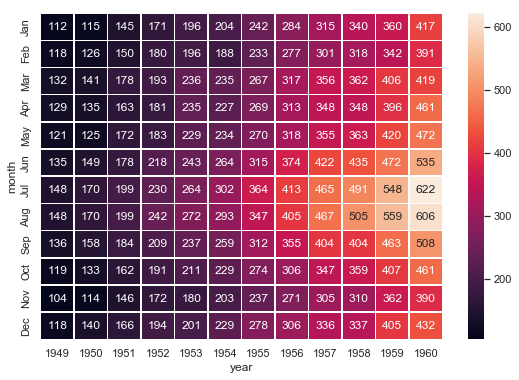

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()



flights_long = sns.load_dataset("flights")
print(flights_long)
flights = flights_long.pivot("month", "year", "passengers")
print(flights)
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)